In [2]:
% matplotlib inline
import numpy
import pandas
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(style="ticks")
numpy.random.seed(sum(map(ord, "axis_grids")))


In [8]:
tips = sns.load_dataset("tips")
tips[:3]


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


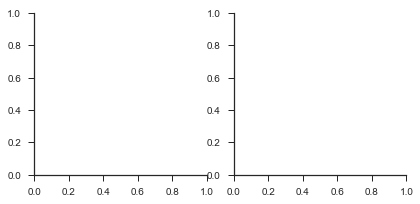

In [10]:
# FacetGrid，可以展示数据集当中的多个子集
# 第一个参数是数据集
# 之后在g变量上绘制
g = sns.FacetGrid(tips, col="time")


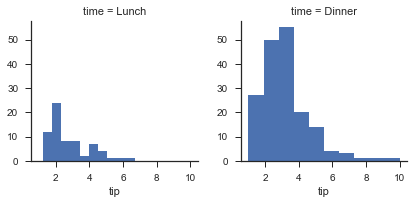

In [11]:
g = sns.FacetGrid(tips, col="time")
# 第一个参数表示要绘制什么样的图
g.map(plt.hist, "tip")


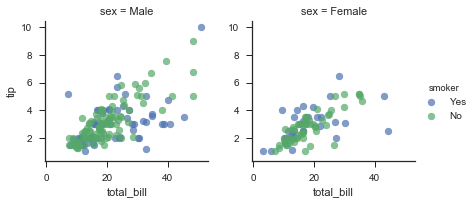

In [13]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
# 绘制散点图
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
# 加上信息标注
g.add_legend()


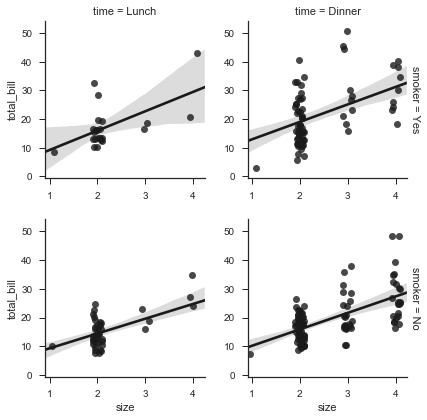

In [16]:
# 设置row和col
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
# 回归分析图，fit_reg表示是否画出回归分析的线，x_jitter表示让数据显示的时候在x轴抖动
g.map(sns.regplot, "size", "total_bill", color=".1", fit_reg=True, x_jitter=.1)


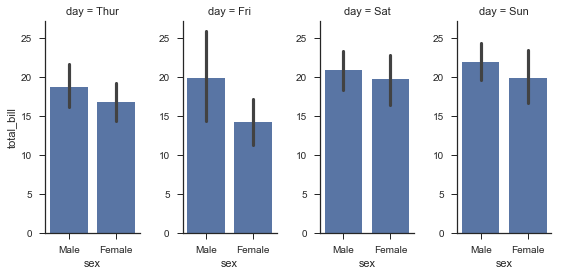

In [17]:
# 设置数量和长宽比
g = sns.FacetGrid(tips, col="day", size=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill")


CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


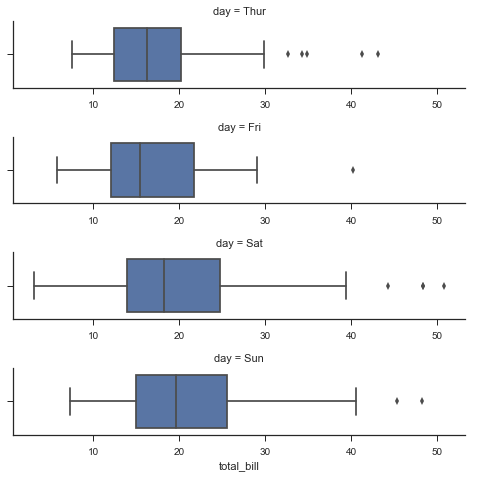

In [22]:
from pandas import Categorical

ordered_days = tips.day.value_counts().index
print(ordered_days)
# 设定顺序，这里用pandas中的数据类型，因为sns中用的都是pandas中的数据类型，用别的数据类型可能会出问题
ordered_days = Categorical(["Thur", "Fri", "Sat", "Sun"])
# 设置row的顺序
g = sns.FacetGrid(tips, row="day", row_order=ordered_days, size=1.7, aspect=4)
g.map(sns.boxplot, "total_bill")
